In [5]:
import pandas as pd
import seaborn as sns
df= sns.load_dataset('titanic')
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

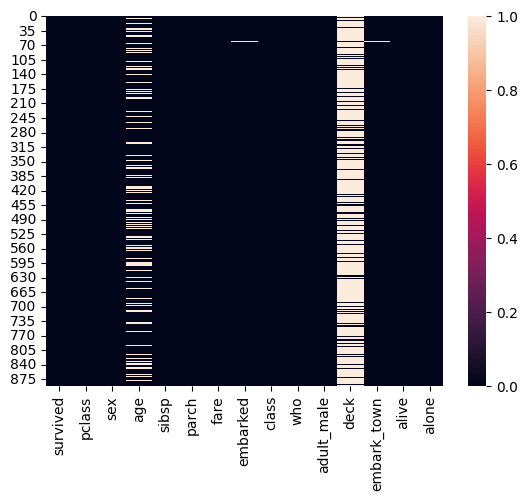

In [5]:
sns.heatmap(df.isnull())

In [ ]:
#handling missing values by deleting all rows

In [12]:
df.dropna().shape

(182, 15)

In [11]:
df.shape 

(891, 15)

Understood the difference actual rows were 891 and we are deleting 182 rows

# Can't we delete particular column
(can do but only in case we found our column has no specific concern in our dataset)

In [13]:
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


look now age and deck columns are deleted
#lets do same with another data set

In [23]:
df2= sns.load_dataset('planets')
df2.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

now from planets dataset there are null values present
(three columns like orbital_period,distance,mass have null values )

In [24]:
df2.shape

(1035, 6)

In [25]:
df2.dropna().shape

(498, 6)

In [27]:
df2.dropna()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


now (three columns like orbital_period,distance,
mass having null values )
and their rows have been deleted

Handling missing values by columns

In [29]:
df2.dropna(axis=1)

,method,number,year
0,Radial Velocity,1,2006
1,Radial Velocity,1,2008
2,Radial Velocity,1,2011
3,Radial Velocity,1,2007
4,Radial Velocity,1,2009
...,...,...,...
1030,Transit,1,2006
1031,Transit,1,2007
1032,Transit,1,2007
1033,Transit,1,2008


Imputation techniques

01- Mean value Imputation

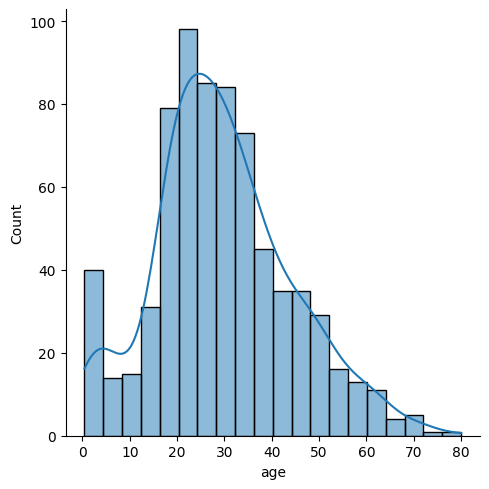

In [37]:
sns.displot(df['age'],kde=True)

In [31]:
df.age.isnull().sum()
#taking titanic dataset

np.int64(177)

In [39]:
df['Age_mean']=df['age'].fillna(df['age'].mean())

In [41]:
df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


Look your age null values have been replaced with null values

In [42]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
Age_mean         0
dtype: int64

2. Median value Imputaion

In [13]:
df['Age_median']=df['age'].fillna(df['age'].median())
df[['Age_median','age']]

,Age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


3.  Mode value Imputation (for categorical data)

In [27]:
df['embarked'].isnull().sum()

np.int64(2)

In [17]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df[df['age'].notna()]['embarked'].mode()[0]

In [24]:
mode=df[df['age'].notna()]['embarked'].mode()[0]

In [28]:
df['embarked_mode']=df['embarked'].fillna(mode)

In [29]:
df['embarked_mode'].isnull().sum()

np.int64(0)